# Model Training and Evaluation
This notebook covers the process of training, evaluating, and comparing machine learning models for loan eligibility prediction.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Import Required Libraries
Import all necessary libraries for data manipulation, visualization, and machine learning.

In [2]:
X = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y = pd.read_csv('../data/processed/y_train.csv').squeeze()


print(X.shape, X_test.shape, y.shape)

(614, 16) (367, 16) (614,)


## Load Processed Data
Read in the preprocessed training and test datasets that will be used for model building and evaluation.

In [3]:
X_train, X_val, y_train, y_val = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)


print(X_train.shape, X_val.shape)

(491, 16) (123, 16)


## Split Data into Training and Validation Sets
Divide the training data into training and validation subsets to evaluate model performance before testing on unseen data.

In [4]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


y_pred_lr = log_reg.predict(X_val)
y_prob_lr = log_reg.predict_proba(X_val)[:,1]

## Train Logistic Regression Model
Fit a logistic regression model to the training data to establish a baseline for classification performance.

In [5]:
print('Accuracy:', accuracy_score(y_val, y_pred_lr))
print('Precision:', precision_score(y_val, y_pred_lr))
print('Recall:', recall_score(y_val, y_pred_lr))
print('F1:', f1_score(y_val, y_pred_lr))
print('ROC-AUC:', roc_auc_score(y_val, y_prob_lr))

Accuracy: 0.8536585365853658
Precision: 0.8316831683168316
Recall: 0.9882352941176471
F1: 0.9032258064516129
ROC-AUC: 0.8715170278637772


## Evaluate Logistic Regression Performance
Calculate and display key classification metrics for the logistic regression model on the validation set.

In [6]:
print(classification_report(y_val, y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



## Show Detailed Classification Report
Display a detailed classification report for the logistic regression model, including precision, recall, and F1-score for each class.

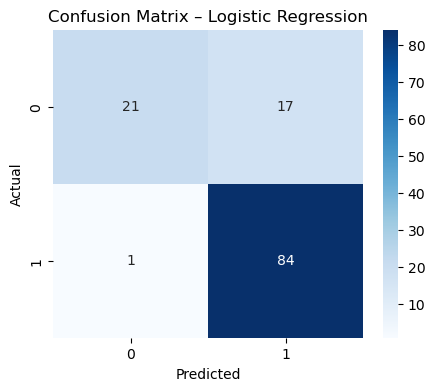

In [7]:
cm = confusion_matrix(y_val, y_pred_lr)


plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Logistic Regression')
plt.show()

## Plot Confusion Matrix for Logistic Regression
Visualize the confusion matrix to better understand the classification results of the logistic regression model.

In [8]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(
n_estimators=200,
random_state=42,
class_weight='balanced'
)


rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_val)
y_prob_rf = rf.predict_proba(X_val)[:,1]

## Train Random Forest Classifier
Fit a random forest classifier to the training data to compare its performance with logistic regression.

In [9]:
print('Accuracy:', accuracy_score(y_val, y_pred_rf))
print('Precision:', precision_score(y_val, y_pred_rf))
print('Recall:', recall_score(y_val, y_pred_rf))
print('F1:', f1_score(y_val, y_pred_rf))
print('ROC-AUC:', roc_auc_score(y_val, y_prob_rf))

Accuracy: 0.8617886178861789
Precision: 0.8617021276595744
Recall: 0.9529411764705882
F1: 0.9050279329608939
ROC-AUC: 0.8475232198142414


## Evaluate Random Forest Performance
Calculate and display key classification metrics for the random forest model on the validation set.

In [10]:
results = pd.DataFrame({
'Model': ['Logistic Regression', 'Random Forest'],
'Accuracy': [
accuracy_score(y_val, y_pred_lr),
accuracy_score(y_val, y_pred_rf)
],
'F1 Score': [
f1_score(y_val, y_pred_lr),
f1_score(y_val, y_pred_rf)
],
'ROC-AUC': [
roc_auc_score(y_val, y_prob_lr),
roc_auc_score(y_val, y_prob_rf)
]
})


results

,Model,Accuracy,F1 Score,ROC-AUC
0,Logistic Regression,0.853659,0.903226,0.871517
1,Random Forest,0.861789,0.905028,0.847523


## Compare Model Results
Create a summary table to compare the performance of logistic regression and random forest models using key metrics.

In [11]:
cv_scores = cross_val_score(
rf, X, y, cv=5, scoring='roc_auc'
)


print('CV ROC-AUC Scores:', cv_scores)
print('Mean ROC-AUC:', cv_scores.mean())

CV ROC-AUC Scores: [0.77244582 0.7371517  0.80006105 0.80006105 0.75783208]
Mean ROC-AUC: 0.7735103407084831


## Cross-Validation for Random Forest
Perform cross-validation to assess the stability and generalizability of the random forest model using ROC-AUC as the scoring metric.

In [12]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)

Credit_History             0.187608
ApplicantIncome            0.142674
TotalIncome                0.139107
EMI                        0.126687
LoanAmount                 0.117913
CoapplicantIncome          0.084464
Loan_Amount_Term           0.031145
Property_Area_Semiurban    0.030074
Married_Yes                0.022604
Education_Not Graduate     0.020786
dtype: float64

## Feature Importance Analysis
Examine which features are most important for the random forest model's predictions.

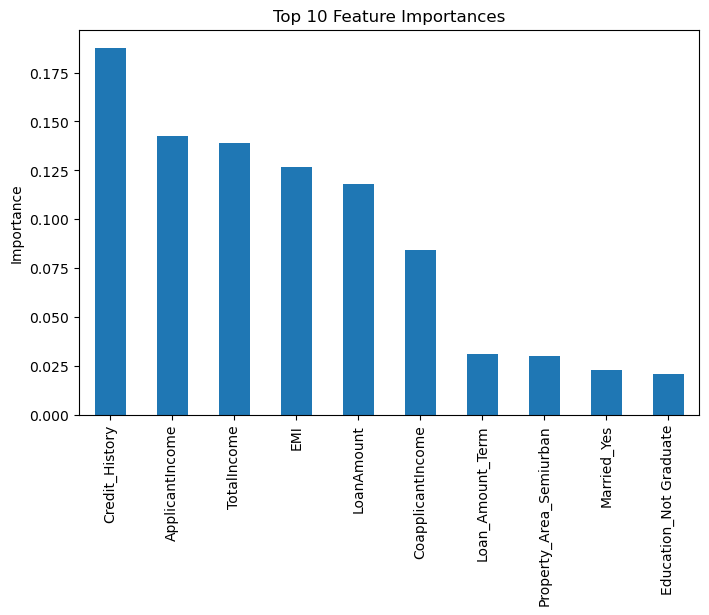

In [13]:
plt.figure(figsize=(8,5))
importances.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance')
plt.show()

## Visualize Top Feature Importances
Plot the top 10 most important features identified by the random forest model.

In [14]:
test_predictions = rf.predict(X_test)


test_predictions[:10]

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

## Make Predictions on Test Data
Use the trained random forest model to predict loan eligibility on the test dataset.